In [103]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quilt
import seaborn as sns
%matplotlib inline

In [21]:
quilt.install("akarve/fivethirtyeight/nfl_fandom", force=True)

Fragment already installed; skipping.
Fragment already installed; skipping.
Fragment already installed; skipping.


In [22]:
from quilt.data.akarve import fivethirtyeight as fte

In [23]:
fte

<PackageNode '/Users/karve/code/examples/quilt_packages/akarve/fivethirtyeight'>
ahca_polls/
airline_safety/
alcohol_consumption/
antiquities_act/
avengers/
bachelorette/
bad_drivers/
bechdel/
biopics/
births/
bob_ross/
buster_posey_mvp/
chess_transfers/
classic_rock/
college_majors/
comic_characters/
comma_survey_data/
congress_age/
congress_generic_ballot/
cousin_marriage/
daily_show_guests/
democratic_bench/
drug_use_by_age/
early_senate_polls/
elo_blatter/
endorsements_june_30/
fandango/
fifa/
flying_etiquette_survey/
food_world_cup/
forecast_methodology/
goose/
hate_crimes/
hip_hop_candidate_lyrics/
historical_ncaa_forecasts/
inconvenient_sequel/
infrastructure_jobs/
librarians/
love_actually/
mad_men/
male_flight_attendants/
march_madness_predictions/
march_madness_predictions_2015/
marriage/
mayweather_mcgregor/
mlb_allstar_teams/
most_common_name/
murder_2016/
nba_draft_2015/
nba_elo/
nba_tattoos/
nba_winprobs/
nfl_fandom/
nfl_favorite_team/
nfl_suspensions/
nfl_ticket_prices/


In [24]:
fte.nfl_fandom

<GroupNode>

NFL_fandom_data_google_trends
NFL_fandom_data_surveymonkey
README

In [25]:
goog = fte.nfl_fandom.NFL_fandom_data_google_trends()

In [26]:
goog.head()

,Unnamed: 0,Pct. Of major sports searches,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,DMA,NFL,NBA,MLB,NHL,NASCAR,CBB,CFB,Trump 2016 Vote%
1,Abilene-Sweetwater TX,45%,21%,14%,2%,4%,3%,11%,79.13%
2,Albany GA,32%,30%,9%,1%,8%,3%,17%,59.12%
3,Albany-Schenectady-Troy NY,40%,20%,20%,8%,6%,3%,4%,44.11%
4,Albuquerque-Santa Fe NM,53%,21%,11%,3%,3%,4%,6%,39.58%


In [27]:
goog.columns

Index(['Unnamed: 0', 'Pct. Of major sports searches', 'Unnamed: 2',
       'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [30]:
# select 3 columns
spts = goog[[goog.columns[x] for x in range(9)]]
# promote row[0] to column names
spts.columns = spts.iloc[0]
# drop the first row, which is the labels
spts = spts.iloc[1:]
# for all of the XX% columns, turn them into floats
str_cols = [spts.columns[x] for x in [1,2,3,4,5,6,7]]
for c in str_cols:
    spts[c] = spts[c].map(lambda x: float(x[:-1])/100)
# turn the last column into a real %
spts[spts.columns[8]] = spts[spts.columns[8]].map(lambda x:float(x[:-1])/100)

# now peak at our clean data
spts.head()

,DMA,NFL,NBA,MLB,NHL,NASCAR,CBB,CFB,Trump 2016 Vote%
1,Abilene-Sweetwater TX,0.45,0.21,0.14,0.02,0.04,0.03,0.11,0.7913
2,Albany GA,0.32,0.30,0.09,0.01,0.08,0.03,0.17,0.5912
3,Albany-Schenectady-Troy NY,0.40,0.20,0.20,0.08,0.06,0.03,0.04,0.4411
4,Albuquerque-Santa Fe NM,0.53,0.21,0.11,0.03,0.03,0.04,0.06,0.3958
5,Alexandria LA,0.42,0.28,0.09,0.01,0.05,0.03,0.12,0.6964


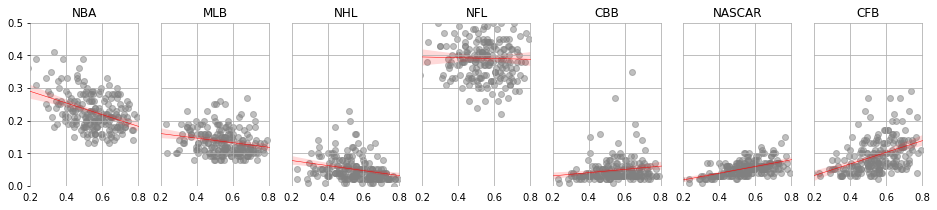

In [136]:
# order league columns from left to neutral to righ tleaning
league_cols = [2, 3, 4, 1, 6, 5, 7]
# dimensions of the subplot
rows = 1
cols = len(league_cols)
# wide figure
plt.figure(figsize=(16,3))
# loop counter for detecting boundary rendering conditions
i = 1
for lc in league_cols:
    axes = plt.subplot(rows, cols, i)
    # limits
    axes.set_xlim([.2, .805])
    axes.set_ylim([0, .5])
    # ticks
    axes.set_xticks(np.arange(.2,.8,.2)) 
    axes.grid()
    axes.spines['top'].set_visible(False)
    axes.spines['bottom'].set_visible(False)
    axes.spines['left'].set_visible(False)
    axes.spines['right'].set_visible(False)
    # title and labels
    axes.title.set_text(spts.columns[lc])
    axes.yaxis.label.set_visible(False)
    axes.xaxis.label.set_visible(False)
    plt.tick_params(top='off', bottom='off', right='off', labelbottom='on')
    left_cond = 'on' if i == 1 else 'off'
    plt.tick_params(left=left_cond, labelleft=left_cond)
    # seaborn scatterplot with custom colors
    sns.regplot(x=spts.columns[8], y=spts.columns[lc], data=spts,
                scatter_kws={'alpha':0.5, 'color':'gray'},
                line_kws={'alpha':1, 'color': 'r', 'lw': .5})
    i += 1